In [224]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_34/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<Figure size 432x288 with 0 Axes>

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


## Introducción

En este checkpoint vamos a realizar un modelo de clasificación basado en árboles de decisión para predecir si una pelicula va a obtener un premio oscar o no. Veremos como graficar los árboles de decisión obtenidos y como varía la precisión luego de limitar la profundidad del mismo.


## Dataset

En esta clase usaremos un dataset con info de películas ("Movie_classification.csv").  
Este dataset esta conformado por los siguientes features:  

 *   **Marketing expense:**    (float64)    Gasto total en Marketing      
 *   **Production expense:**   (float64)    Gasto total de Producción
 *   **Multiplex coverage:**   (float64)    Cobertura promedio de Multiplex
 *   **Budget:**               (float64)    Presupuesto
 *   **Movie_length:**         (float64)    Duración de la película
 *   **Lead_ Actor_Rating:**   (float64)    Puntaje sobre el actor principal
 *   **Lead_Actress_rating:**  (float64)    Puntaje sobre la actriz principal
 *   **Director_rating:**      (float64)    Puntaje sobre el Director
 *   **Producer_rating:**      (float64)    Puntaje sobre el Productor
 *   **Critic_rating:**        (float64)    Puntaje que le puso la crítica
 *   **Trailer_views:**        (int64)      Cantidad de vistas del Trailer
 *   **3D_available:**         (object)     Si esta disponible en 3D (Yes/No)
 *   **Time_taken:**           (float64)    Duración de la película
 *   **Twitter_hastags:**      (float64)    Cantidad de menciones en twitter
 *   **Genre:**                (object)     Genero de la película
 *   **Avg_age_actors:**       (int64)      Edad promedio de los actores
 *   **Num_multiplex:**        (int64)      Cantidad de Multiplex
 *   **Collection:**           (int64)      Recaudación
 *   **Start_Tech_Oscar:**     (int64)      Si recibió un oscar o no.
 
 


## Imports

In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Ejercicio 1 - Importar datos

1) Leamos los datos de "Movie_classification.csv" y lo guardamos en un dataframe de pandas.  
2) Veamos cuántos registros hay en cada DataFrame y de qué tipos son los datos de cada columna.   
3) Veamos los primeros registros de cada DataFrame para verificar que los datos fueron importados correctamente.

In [226]:
df = pd.read_csv('../Data/Movie_classification.csv')


In [227]:
df.shape

(506, 19)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [229]:
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


In [230]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [231]:
# Variable target esta aproximadamente balanceada

df.Start_Tech_Oscar.value_counts(normalize=True)

1    0.545455
0    0.454545
Name: Start_Tech_Oscar, dtype: float64

## Ejercicio 2 - Imputación de valores faltantes

Veamos si existen valores faltantes y en tal caso imputemos los mismos.

In [232]:
#vemos la cantidad de valores que tiene cada columna
df.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [233]:
df['Time_taken'].fillna(value = df.Time_taken.mean(), inplace=True)
df.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

## Ejercicio 3 - Generación de Variables Dummies.

Veamos si existen variables categóricas y en tal caso generar variables dummies para dichas columnas.

In [234]:
df.head(3)
cat_columns =['3D_available','Genre']
df = pd.get_dummies(df, cat_columns, drop_first=True)

In [235]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


## Ejercicio 4 - Features, Target

Construyamos una matriz de features (X) y el vector target (Y) para predecir `Start_Tech_Oscar` en el dataset de datos completos



In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X = df.drop('Start_Tech_Oscar', axis=1)

y = df.Start_Tech_Oscar

## Ejercicio 5 - Train Test Split

Constuyamos los conjuntos de train y test, asignando el 70% de los registros a train y el 30% a test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, shuffle = True, test_size=.3, random_state = 42)

## Ejercicio 6 - Entrenamos el árbol de clasificación
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

Entrenemos el árbol de clasificación y realizar las predicciones tanto para el dataset de entrenamiento como el de pruebas


In [239]:
from sklearn import tree
%matplotlib inline

In [240]:
tree_clf = tree.DecisionTreeClassifier(criterion = 'gini')

In [241]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

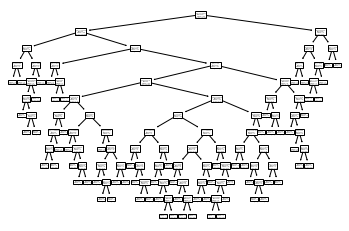

In [242]:
tree.plot_tree(tree_clf)
print()

## Ejercicio 7 - Verificamos la performance del modelo
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html  

Importemos las librerías de `accuracy_score`  y `confusion_matrix` para analizar la performance de nuestro modelo tanto para el dataset de entrenamiento como el de pruebas 


In [243]:
from sklearn.metrics import accuracy_score, confusion_matrix

Recordamos que la matriz de confusión tiene la siguiente forma:

<img style="float: center;" src="img/matriz_confusion.png">

<img style="float: center;" src="img/matriz_confusion_2.png">

In [244]:
y_pred_tree = tree_clf.predict(X_test)
y_pred_tree_train = tree_clf.predict(X_train)

In [245]:
accuracy_score(y_test, y_pred_tree)

0.5723684210526315

In [246]:
accuracy_score(y_train, y_pred_tree_train)

1.0

In [247]:
# Claro overfitting

In [248]:
confusion_matrix(y_test, y_pred_tree)

array([[32, 37],
       [28, 55]])

Los árboles de decisión implementados en skitlearn ofrecen un atributo llamado `feature_importances_`. Es la contribunción a la reducción de las impurezas a lo largo de todo el árbol.  
Observemos los resultados del atributo `feature_importances_`

In [249]:
pd.DataFrame({'Features':X.columns, 'Importancia':tree_clf.feature_importances_}).sort_values('Importancia', ascending = False)

,Features,Importancia
3,Budget,0.173976
11,Time_taken,0.118331
9,Critic_rating,0.096838
15,Collection,0.092511
13,Avg_age_actors,0.082072
4,Movie_length,0.075049
10,Trailer_views,0.071695
12,Twitter_hastags,0.061179
14,Num_multiplex,0.050585
0,Marketing expense,0.044568


## Ejercicio 8 - Graficamos el modelo de ML.

Es necesario tener instaladas las librerias de `graphviz` y `pydotplus`

```
> conda install graphviz
> pip install pydotplus
```

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html  
https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/


In [250]:
# This function generates a GraphViz representation of the decision tree, which is then written into out_file
dot_data = tree.export_graphviz(tree_clf, feature_names = X.columns, filled = True)


In [251]:
from IPython.display import Image

In [252]:
import pydotplus

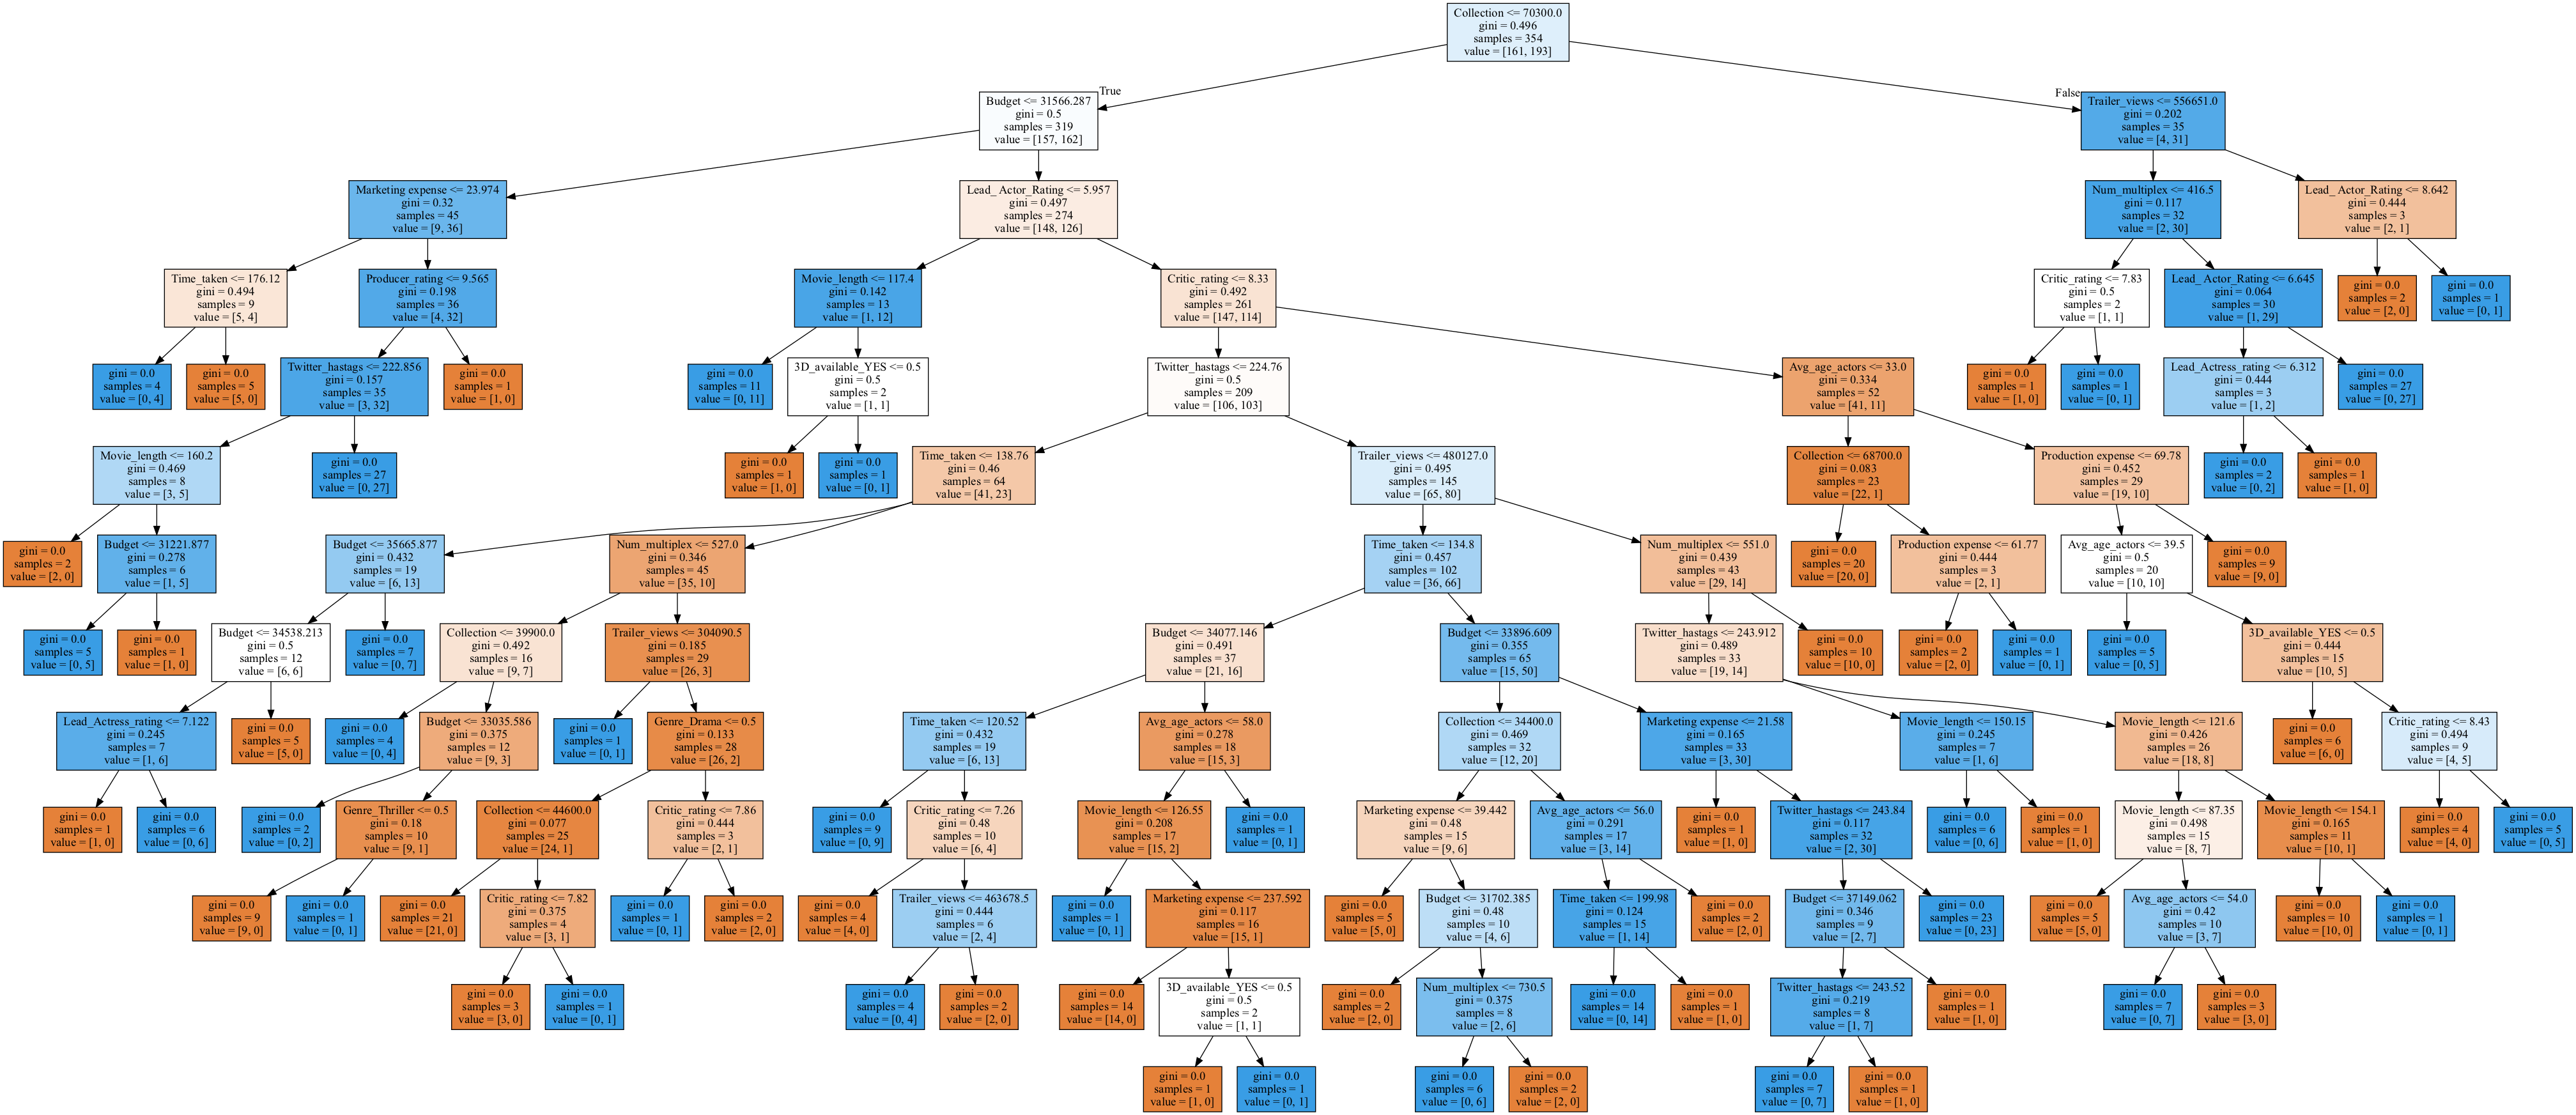

In [253]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Ejercicio 9 - Analizamos como varía la performance al reducir la altura del árbol (tree prunning).

Realizamos tree prunning definiendo los siguientes hiper-parámetros:
 - min_samples_leaf = 20
 - max_depth = 4  
 
Luego graficamos el árbol entrenado y verificamos la performance en el dataset de pruebas.
 

In [254]:
tree_clf_2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth = 4)

In [255]:
tree_clf_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

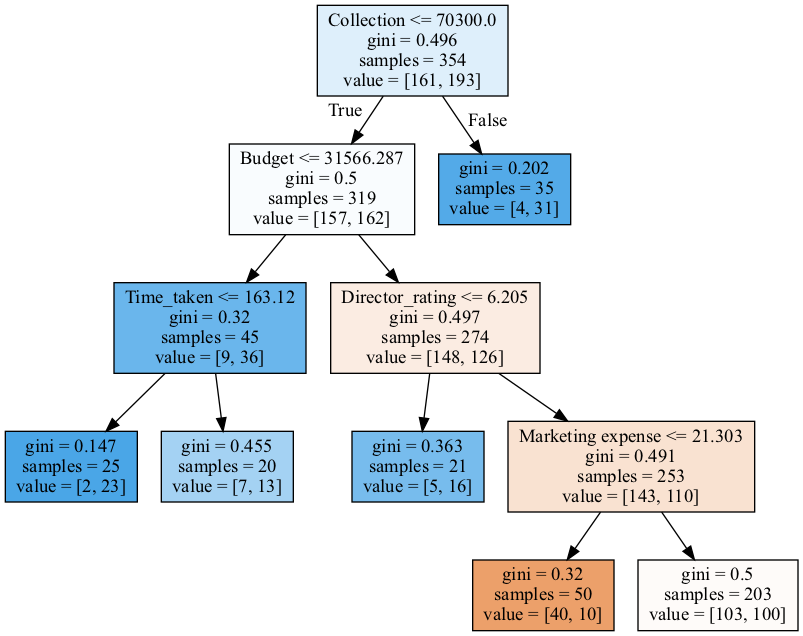

In [256]:
y_pred_tree2=tree_clf_2.predict(X_test)

# Grafico el 2do arbol podado
dot_data_2 = tree.export_graphviz(tree_clf_2, feature_names = X.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data_2)
Image(graph.create_png())

In [257]:
# Vemos que el Gini en el nodo raiz, da cercano a 0.5, el peor, el mejor seria lo mas cercano a 0

In [258]:
confusion_matrix(y_test, y_pred_tree2)

array([[58, 11],
       [51, 32]])

In [259]:
accuracy_score(y_test, y_pred_tree2)

0.5921052631578947

## Ejercicio 10 - Optimizamos nuestro árbol de decisión ajustando los hiperparámetros mediante el uso de gridsearch.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  

Optimizamos el modelo, aplicando gridseach con los siguientes hiperparametros:

```python 
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,None],
                "min_samples_split": [2, 3, 4,None]}
``` 



In [260]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [261]:
tree333 = tree.DecisionTreeClassifier(random_state=40)
kfold = KFold(n_splits=10, shuffle=True, random_state=10)

param = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,None],
                "min_samples_split": [2, 3, 4,None]}

In [262]:
gs=GridSearchCV(tree333, param_grid = param, n_jobs=-1, cv = kfold, scoring = 'accuracy')

In [263]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=40), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min_samples_split': [2, 3, 4, None]},
             scoring='accuracy')

In [264]:
best_tree=gs.best_estimator_

In [265]:
accuracy_score(y_test, best_tree.predict(X_test))

0.6710526315789473

In [266]:
confusion_matrix(y_test, best_tree.predict(X_test))

array([[42, 27],
       [23, 60]])

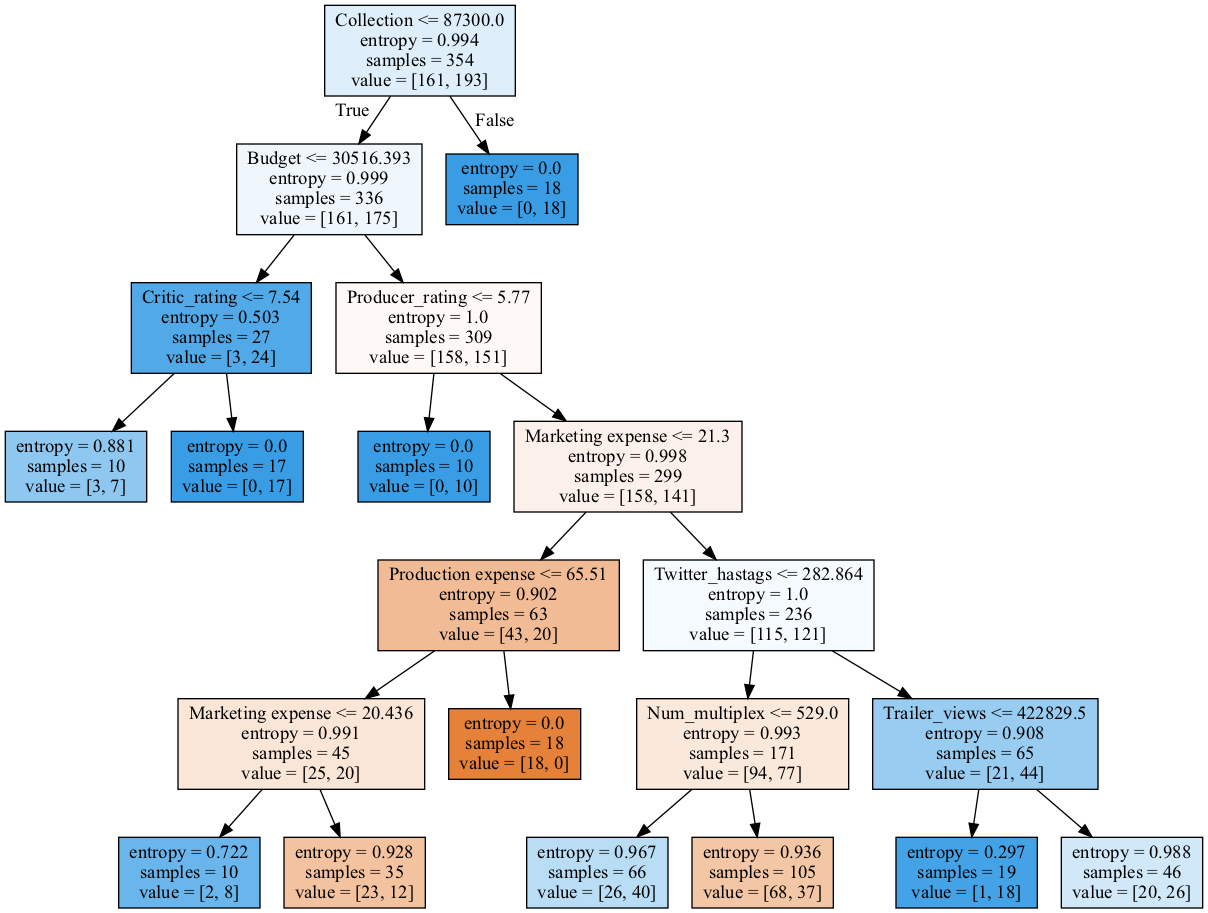

In [267]:

# Grafico el 2do arbol podado
dot_data_best_tree = tree.export_graphviz(best_tree, feature_names = X.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data_best_tree)
Image(graph.create_png())

In [268]:
pd.DataFrame({'Features':X.columns, 'Importancia':best_tree.feature_importances_}).sort_values('Importancia', ascending = False)

,Features,Importancia
15,Collection,0.181080
3,Budget,0.145312
1,Production expense,0.135296
8,Producer_rating,0.117345
0,Marketing expense,0.116727
10,Trailer_views,0.087754
14,Num_multiplex,0.084698
12,Twitter_hastags,0.078844
9,Critic_rating,0.052945
6,Lead_Actress_rating,0.000000


In [269]:
X_train.to_csv("../Data/Movie_classification_train_X.csv", sep="\t", header=True, index = False)

X_test.to_csv("../Data/Movie_classification_test_X.csv", sep="\t", header=True, index = False)

y_train.to_csv("../Data/Movie_classification_train_y.csv", sep="\t", header=True, index = False)

y_test .to_csv("../Data/Movie_classification_test_y.csv", sep="\t", header=True, index = False)